In [12]:
from math import floor
import matplotlib.pyplot as plt

import numpy as np
from numpy import array, int32
import random

def read_pgm(path):
    with open(path, 'rb') as pgmf:
        im = plt.imread(pgmf)
    return im

In [13]:
def addNoise(img):
    new_im = np.zeros((img.shape[0], img.shape[1]))

    for i in range(0, img.shape[0]):
        for j in range(0,img.shape[1]):
            rand = random.randint(0,20)
            if rand == 0:
                new_im[i][j] = 0
            elif rand == 20:
                new_im[i][j] = 255
            else:
                new_im[i][j] = img[i][j]
    return new_im

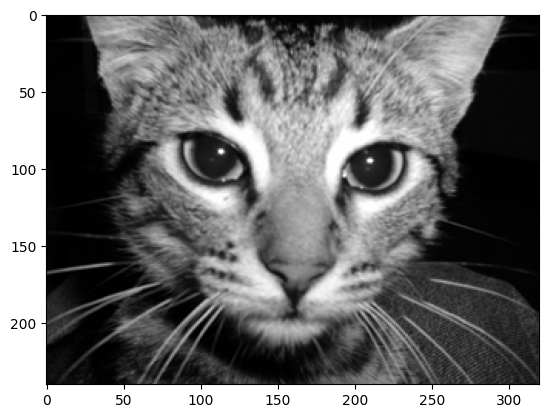

In [14]:
chatImg = read_pgm('./chat.pgm')
plt.imshow(chatImg, cmap='gray')
plt.show()

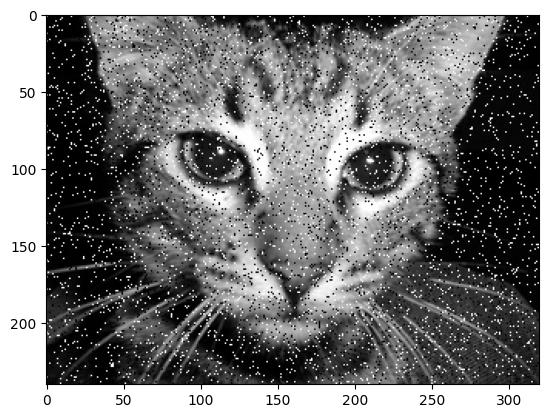

In [35]:
chatImgWithNoise = addNoise(chatImg)
plt.imshow(chatImgWithNoise, cmap='gray')
plt.show()



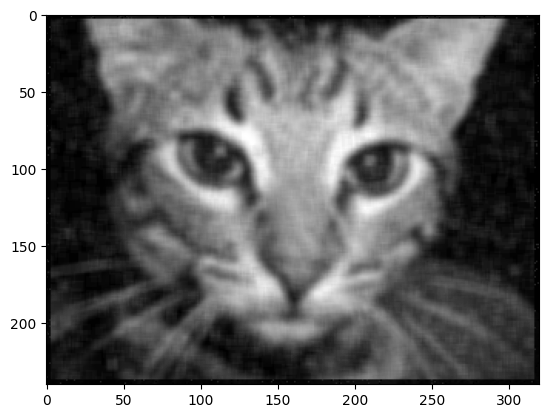

In [62]:
def filtreMoy(n):
    filtre = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            filtre[i][j] = 1.0/n
    return filtre
    
def applyFilter(img, filtre): 
    n = filtre.shape[0]

    new_im = np.zeros((img.shape[0], img.shape[1]))
    for i in range(0, img.shape[0]):
        for j in range(0,img.shape[1]):
            if i < n//2 or j < n//2 or i > img.shape[0] - n//2 - 1 or j > img.shape[1] - n//2 - 1:
                new_im[i,j] = img[i,j]
            else:
                window = img[i - n//2 : i + n//2 +1, j - n//2 : j + n//2 +1]
                output = np.sum(window * filtre)
                new_im[i,j] = output
    return new_im
    
def applyFiltreMoy(img, n): 
    new_im = applyFilter(img, filtreMoy(n))
    return new_im
    

chatImgMoy = applyFiltreMoy(chatImgWithNoise, 7)
plt.imshow(chatImgMoy,cmap='gray')
plt.show()

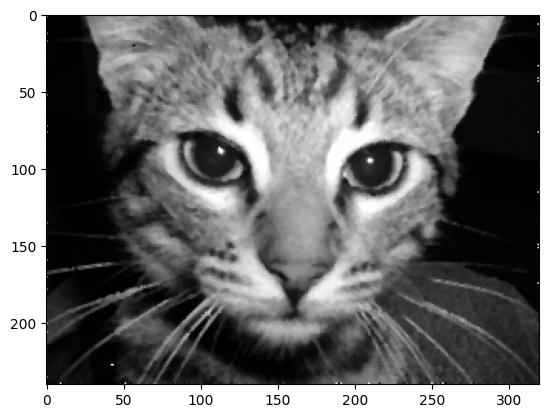

In [61]:
def applyMedianFilter(img, n):
    new_im = np.zeros((img.shape[0], img.shape[1]))
    for i in range(0, img.shape[0]):
        for j in range(0,img.shape[1]):
            if i < n//2 or j < n//2 or i > img.shape[0] - n//2 - 1 or j > img.shape[1] - n//2 - 1:
                new_im[i,j] = img[i,j]
            else:
                window = img[i - n//2 : i + n//2 +1, j - n//2 : j + n//2 +1]
                output = np.median(window)
                new_im[i,j] = output
    return new_im
chatImgMedian = applyMedianFilter(chatImgWithNoise, 3)
plt.imshow(chatImgMedian,cmap='gray')
plt.show()